In [74]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import librosa
import matplotlib.pyplot as plt
import librosa

from sklearn.model_selection import train_test_split

# From Kris Naik talk

### Load audio data from the file

In [75]:
file_path = '../data/UrbanSound8K/audio/fold1/99180-9-0-7.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(file_path)

In [76]:
print('Sample rat is :', librosa_sample_rate)

Sample rat is : 22050


In [77]:
print(librosa_audio_data)

[ 0.15000913  0.13483565  0.0852989  ... -0.14229915 -0.08435199
 -0.03273332]


By default, audio data is mono

 Plot audio data`

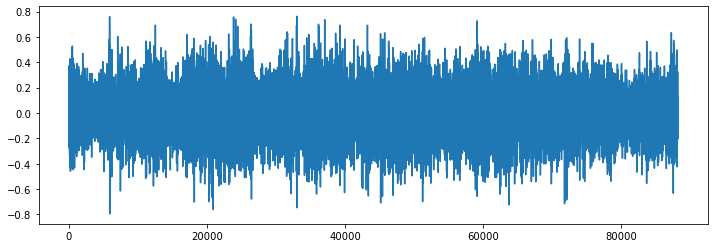

In [91]:
# Original audio in mono 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [92]:
### Open the same file with scipy

In [93]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(file_path) 

In [94]:
wave_audio

array([[ 5207,  5207],
       [ 1122,  1122],
       [ -662,  -662],
       ...,
       [-3599, -3599],
       [-6598, -6598],
       [-4247, -4247]], dtype=int16)

The above wave audio file is a sterio

In [82]:
print("Wave_sample_rate: ", wave_sample_rate)

Wave_sample_rate:  8000


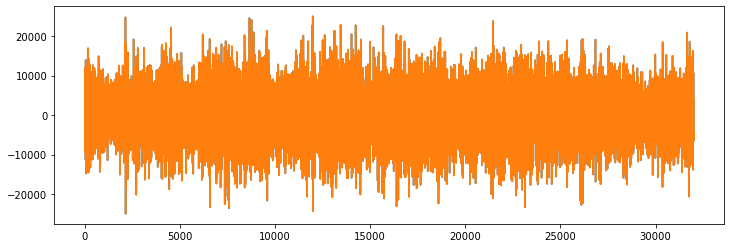

In [83]:
# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples.

The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

There is an excellant video on this subject by Valerio Velardo

In [84]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [85]:
mfccs

array([[-166.5974    , -168.07478   , -177.60622   , ..., -158.38596   ,
        -147.28214   , -118.51535   ],
       [ 247.07541   ,  246.40448   ,  239.32913   , ...,  251.64044   ,
         247.59479   ,  212.5983    ],
       [ -83.169136  ,  -82.10238   ,  -81.56915   , ...,  -91.08234   ,
         -90.1494    ,  -67.304214  ],
       ...,
       [   4.3784738 ,    0.47946548,   -0.28980947, ...,    4.4939384 ,
           2.810526  ,    3.3963847 ],
       [   7.362631  ,    3.8637054 ,    0.9075327 , ...,   15.513621  ,
          12.762537  ,   13.761705  ],
       [  -6.2743254 ,   -6.6558795 ,  -10.477694  , ...,    3.0284958 ,
           5.8520966 ,    8.055782  ]], dtype=float32)

Above array is the patterns extracted from the audio file

In [86]:
#### Extracting MFCC's For every audio file

audio_dataset_path='../data/UrbanSound8K/audio/'
metadata=pd.read_csv('../data/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [87]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [88]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:07, 13.92it/s]/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [09:21, 19.32it/s]/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [09:45, 14.91it/s]


In [89]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [90]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [28]:
X.shape

(8732, 40)

In [29]:
y.shape

(8732,)

In [58]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([9])

In [59]:
y.shape

(8732, 10)

In [60]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6985, 40), (6985, 10), (1747, 40), (1747, 10))

## Model Selection - ANN

In [62]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [64]:
num_labels = y.shape[1]
print('Number of labels: ', num_labels)

Number of labels:  10


In [65]:
model = Sequential()
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

In [67]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [68]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 23.3991 - accuracy: 0.1000 - val_loss: 2.2895 - val_accuracy: 0.1236

Epoch 00001: val_loss improved from inf to 2.28950, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 2.7420 - accuracy: 0.1195 - val_loss: 2.2765 - val_accuracy: 0.1191

Epoch 00002: val_loss improved from 2.28950 to 2.27648, saving model to saved_models/audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 2.3549 - accuracy: 0.1216 - val_loss: 2.2669 - val_accuracy: 0.1231

Epoch 00003: val_loss improved from 2.27648 to 2.26695, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 2.3056 - accuracy: 0.1186 - val_loss: 2.2532 - val_accuracy: 0.1351

Epoch 00004: val_loss improved from 2.26695 to 2.25319, saving model to saved_models/audio_cla

In [71]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7607327103614807


In [72]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([9])

In [95]:
filename="UrbanSound8K/drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'UrbanSound8K/drilling_1.wav'